# Exploratory Data Analysis: Sales Data

- Identify which are the top Stores per States
- Identify which products are interesting for each category

In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import yaml
from datetime import datetime, timedelta

# Get the current project path (where you open the notebook)
# and go up two levels to get the project path
current_dir = Path.cwd()
proj_path = current_dir.parent.parent

# Catalog contains all the paths related to datasets
with open(os.path.join(proj_path, 'conf/catalog.yml'), "r") as f:
    catalog = yaml.safe_load(f)['breakfast']

In [3]:
transactions = pd.read_csv(os.path.join(proj_path, catalog['output_dir']['dir'], catalog['output_dir']['transactions']))
products_lookup = pd.read_csv(os.path.join(proj_path, catalog['output_dir']['dir'], catalog['output_dir']['products']))
store_lookup = pd.read_csv(os.path.join(proj_path, catalog['output_dir']['dir'], catalog['output_dir']['store']))

In [11]:
transactions.head(3)

,Unnamed: 0,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0


In [12]:
store_lookup.head(2)

,Unnamed: 0,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692
1,1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231


In [18]:
# See which stores sales the most by states
merged_data = transactions.merge(store_lookup[['STORE_ID','STORE_NAME','ADDRESS_STATE_PROV_CODE','SEG_VALUE_NAME']], how='left', left_on='STORE_NUM', right_on='STORE_ID')
merged_data = merged_data.merge(products_lookup[['UPC','CATEGORY']], how='left', on='UPC')
merged_data

,Unnamed: 0,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,ADDRESS_STATE_PROV_CODE,SEG_VALUE_NAME,CATEGORY
0,0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,367,15TH & MADISON,KY,VALUE,BAG SNACKS
1,1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,367,15TH & MADISON,KY,VALUE,BAG SNACKS
2,2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,367,15TH & MADISON,KY,VALUE,BAG SNACKS
3,3,2009-01-14,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,367,15TH & MADISON,KY,VALUE,ORAL HYGIENE PRODUCTS
4,4,2009-01-14,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,367,15TH & MADISON,KY,VALUE,ORAL HYGIENE PRODUCTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524945,524945,2012-01-04,29159,31254742735,1,1,1,4.97,4.97,4.97,0,0,0,29159,CARROLLTON,TX,MAINSTREAM,ORAL HYGIENE PRODUCTS
524946,524946,2012-01-04,29159,31254742835,5,5,5,24.85,4.97,4.97,0,0,0,29159,CARROLLTON,TX,MAINSTREAM,ORAL HYGIENE PRODUCTS
524947,524947,2012-01-04,29159,88491201426,32,29,23,105.92,3.31,3.31,0,0,0,29159,CARROLLTON,TX,MAINSTREAM,COLD CEREAL
524948,524948,2012-01-04,29159,88491201427,30,26,23,99.30,3.31,3.31,0,0,0,29159,CARROLLTON,TX,MAINSTREAM,COLD CEREAL


In [14]:
# There are a total of 77 stores
merged_data['STORE_NUM'].unique().size

77

In [15]:
# There are four states in total
merged_data['ADDRESS_STATE_PROV_CODE'].unique().size

4

In [17]:
merged_data

,Unnamed: 0,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,STORE_ID,STORE_NAME,ADDRESS_STATE_PROV_CODE,CATEGORY
0,0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,367,15TH & MADISON,KY,BAG SNACKS
1,1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,367,15TH & MADISON,KY,BAG SNACKS
2,2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,367,15TH & MADISON,KY,BAG SNACKS
3,3,2009-01-14,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,367,15TH & MADISON,KY,ORAL HYGIENE PRODUCTS
4,4,2009-01-14,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,367,15TH & MADISON,KY,ORAL HYGIENE PRODUCTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524945,524945,2012-01-04,29159,31254742735,1,1,1,4.97,4.97,4.97,0,0,0,29159,CARROLLTON,TX,ORAL HYGIENE PRODUCTS
524946,524946,2012-01-04,29159,31254742835,5,5,5,24.85,4.97,4.97,0,0,0,29159,CARROLLTON,TX,ORAL HYGIENE PRODUCTS
524947,524947,2012-01-04,29159,88491201426,32,29,23,105.92,3.31,3.31,0,0,0,29159,CARROLLTON,TX,COLD CEREAL
524948,524948,2012-01-04,29159,88491201427,30,26,23,99.30,3.31,3.31,0,0,0,29159,CARROLLTON,TX,COLD CEREAL


In [20]:
# Sort all the stores by total number of units sold, and show the state province
pd.set_option("display.max_rows", 20)

merged_data[['STORE_NUM', 'UNITS', 'ADDRESS_STATE_PROV_CODE','SEG_VALUE_NAME']].groupby(['STORE_NUM','ADDRESS_STATE_PROV_CODE','SEG_VALUE_NAME']).sum().sort_values('UNITS', ascending=False).reset_index()[:20]

,STORE_NUM,ADDRESS_STATE_PROV_CODE,SEG_VALUE_NAME,UNITS
0,2277,OH,UPSCALE,362386
1,25027,OH,MAINSTREAM,344913
2,24991,OH,UPSCALE,287722
3,2281,OH,UPSCALE,268379
4,9825,OH,MAINSTREAM,267803
5,21227,OH,UPSCALE,245339
6,389,KY,MAINSTREAM,237272
7,21237,OH,MAINSTREAM,236132
8,19265,KY,MAINSTREAM,209147
9,13609,OH,MAINSTREAM,195510


In [11]:
# sort most sold units by upcs and category
sorted_upc_cat = merged_data[['UPC', 'UNITS', 'CATEGORY']].groupby(['UPC', 'CATEGORY']).sum().sort_values('UNITS', ascending=False).reset_index()
sorted_upc_cat.head()

,UPC,CATEGORY,UNITS
0,1600027527,COLD CEREAL,804228
1,1111009477,BAG SNACKS,670625
2,3800031838,COLD CEREAL,565894
3,1111009497,BAG SNACKS,531011
4,1600027564,COLD CEREAL,517126


In [12]:
# There are four categories, 'BAG SNACKS', 'ORAL HYGIENE PRODUCTS', 'COLD CEREAL', 'FROZEN PIZZA'
categories = merged_data['CATEGORY'].unique()
stores = [2277,389,4245]

# Plots per Category

The following plots are for each category. Each column consists of one store, specified above. Current selection are the top stores for three different states. The X axis will be time and Y axis will be number of units sold.   

- Each column is one store
- Each row is one UPC

The rows are sorted by most units sold total per each category. This suggests to focus on the top rows for choosing which products to use. Another consideration is if the products have sells from 2009-01-14 up to 2010-12-15. Some products may not meet this criteria and some stores might not carry a specific UPC. These will appear as blank plots. 

The data wasn't shown after 2010, as the data in 2011 will be used for testing the models. We don't want to look at how that data looks like.

In [13]:
def plot_category(category, sorted_upc_cat, stores, merged_data, products_lookup):
    
    sorted_upcs = sorted_upc_cat[sorted_upc_cat['CATEGORY']==category]['UPC'].values

    # nrows = number of stores selected
    # ncols = number of stores
    # figsize will vary depending on number of products
    fig, axes = plt.subplots(nrows=len(sorted_upcs), ncols=len(stores), figsize=(20,5*len(sorted_upcs)))
    plt.subplots_adjust(hspace=0.8)

    print(f'Category: {category}')
    # For every UPC and store, filter the data and plot it
    for row, upc in enumerate(sorted_upcs):
        for col, store in enumerate(stores):
            products_failed = []
            # some products aren't sold in all stores
            try:
                filtered_data = merged_data[(merged_data['STORE_NUM']==store) & 
                                            (merged_data['UPC']==upc) &
                                            (merged_data['WEEK_END_DATE'] < '2010-12-31') &
                                            (merged_data['CATEGORY'] == category)]
                filtered_data.plot(x='WEEK_END_DATE', 
                                   y='UNITS',
                                   ax=axes[row, col],
                                   title=f"store: {stores[col]}\nupc: {upc}\ndesc: {products_lookup[products_lookup['UPC']==upc]['DESCRIPTION'].values[0]}")
                for label in axes[row, col].get_xticklabels():
                    label.set_rotation(40)
                    label.set_horizontalalignment('right')

            except:
                products_failed.append(products_lookup[products_lookup['UPC']==upc]['DESCRIPTION'].values[0])
    
    # If list is empty, this is good.
    if len(products_failed) > 0:
        print(f"No data for {products_failed}")
    plt.show()

Category: BAG SNACKS


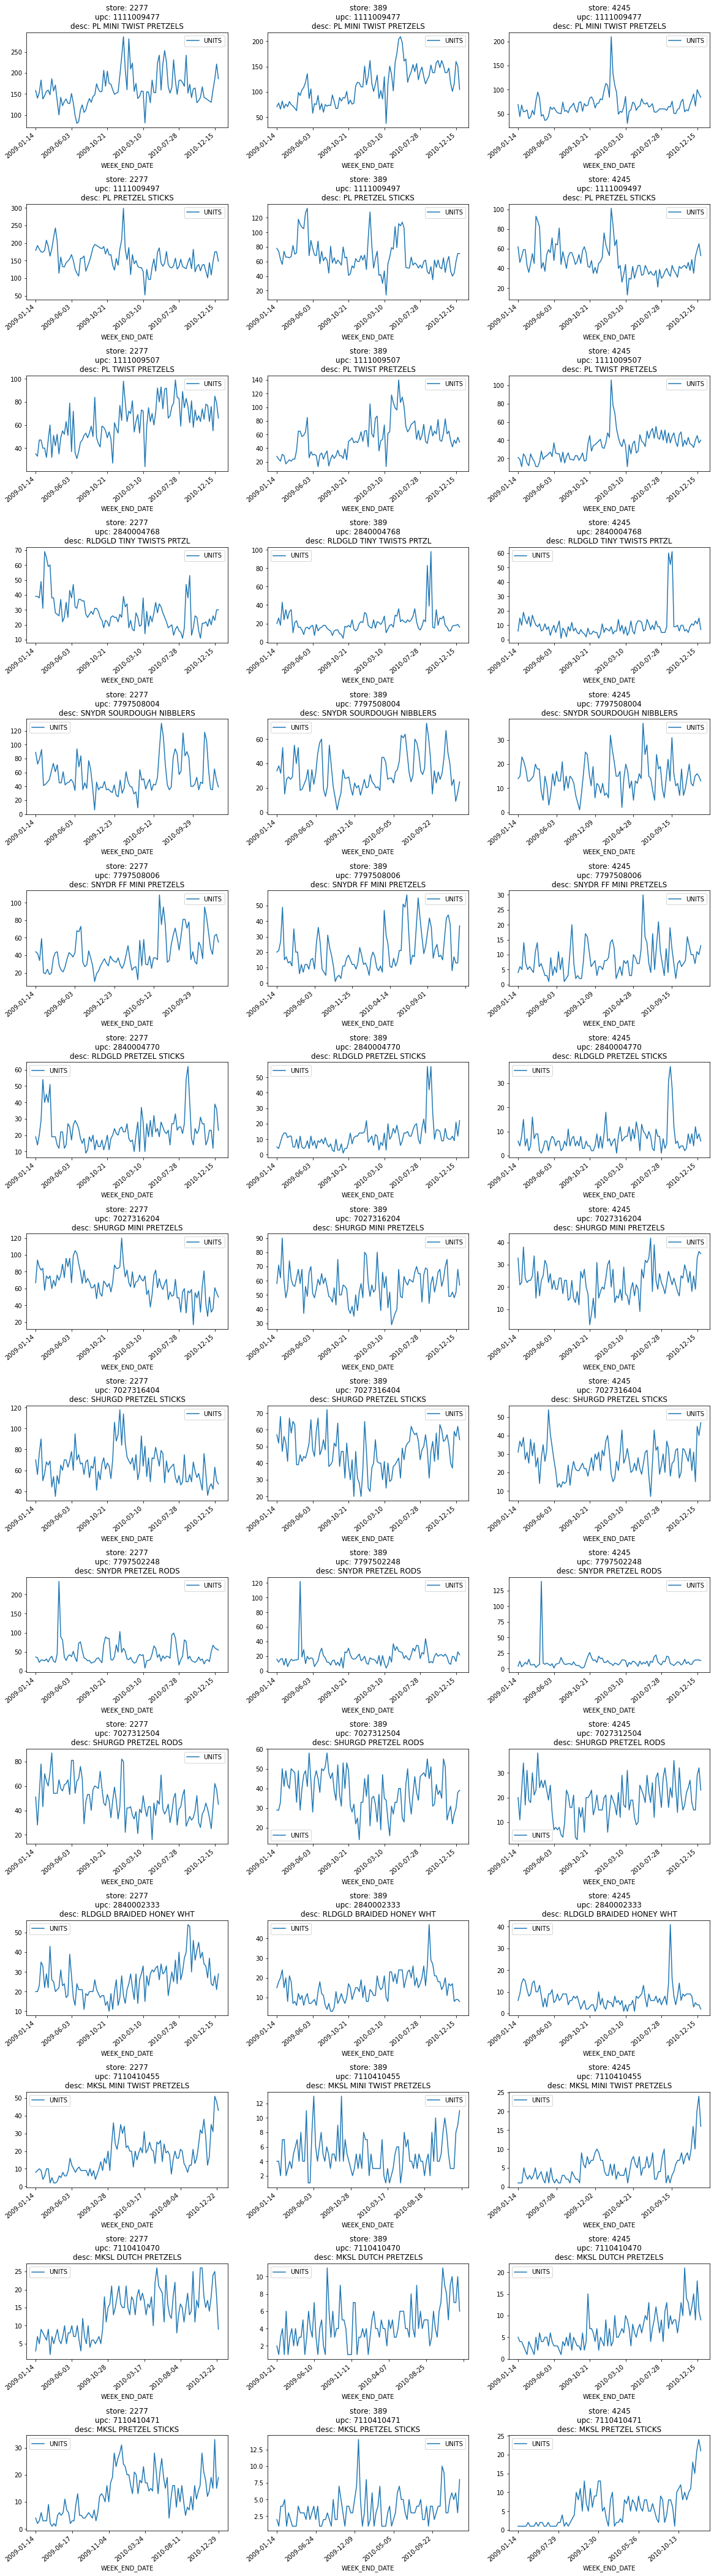

In [14]:
plot_category(categories[0], sorted_upc_cat, stores, merged_data, products_lookup)

Category: ORAL HYGIENE PRODUCTS


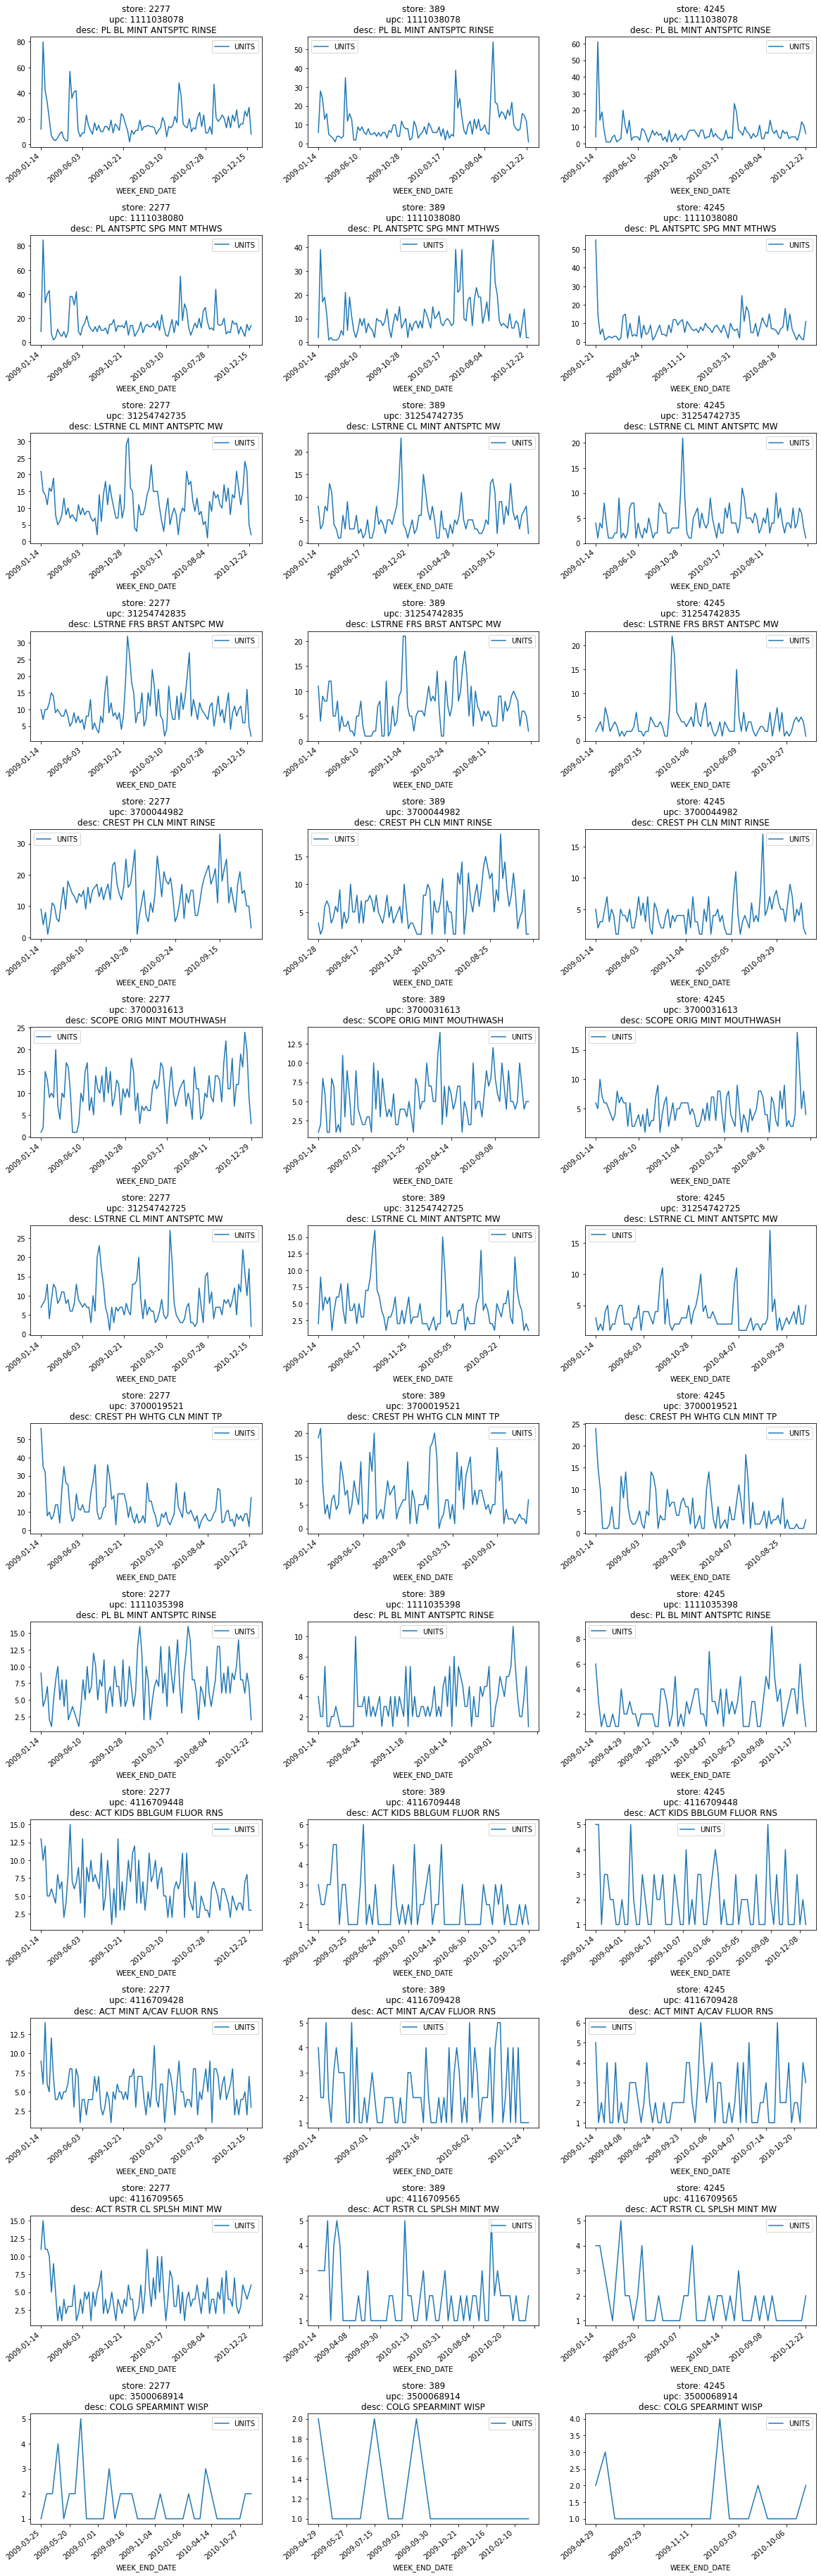

In [15]:
plot_category(categories[1], sorted_upc_cat, stores, merged_data, products_lookup)

Category: COLD CEREAL


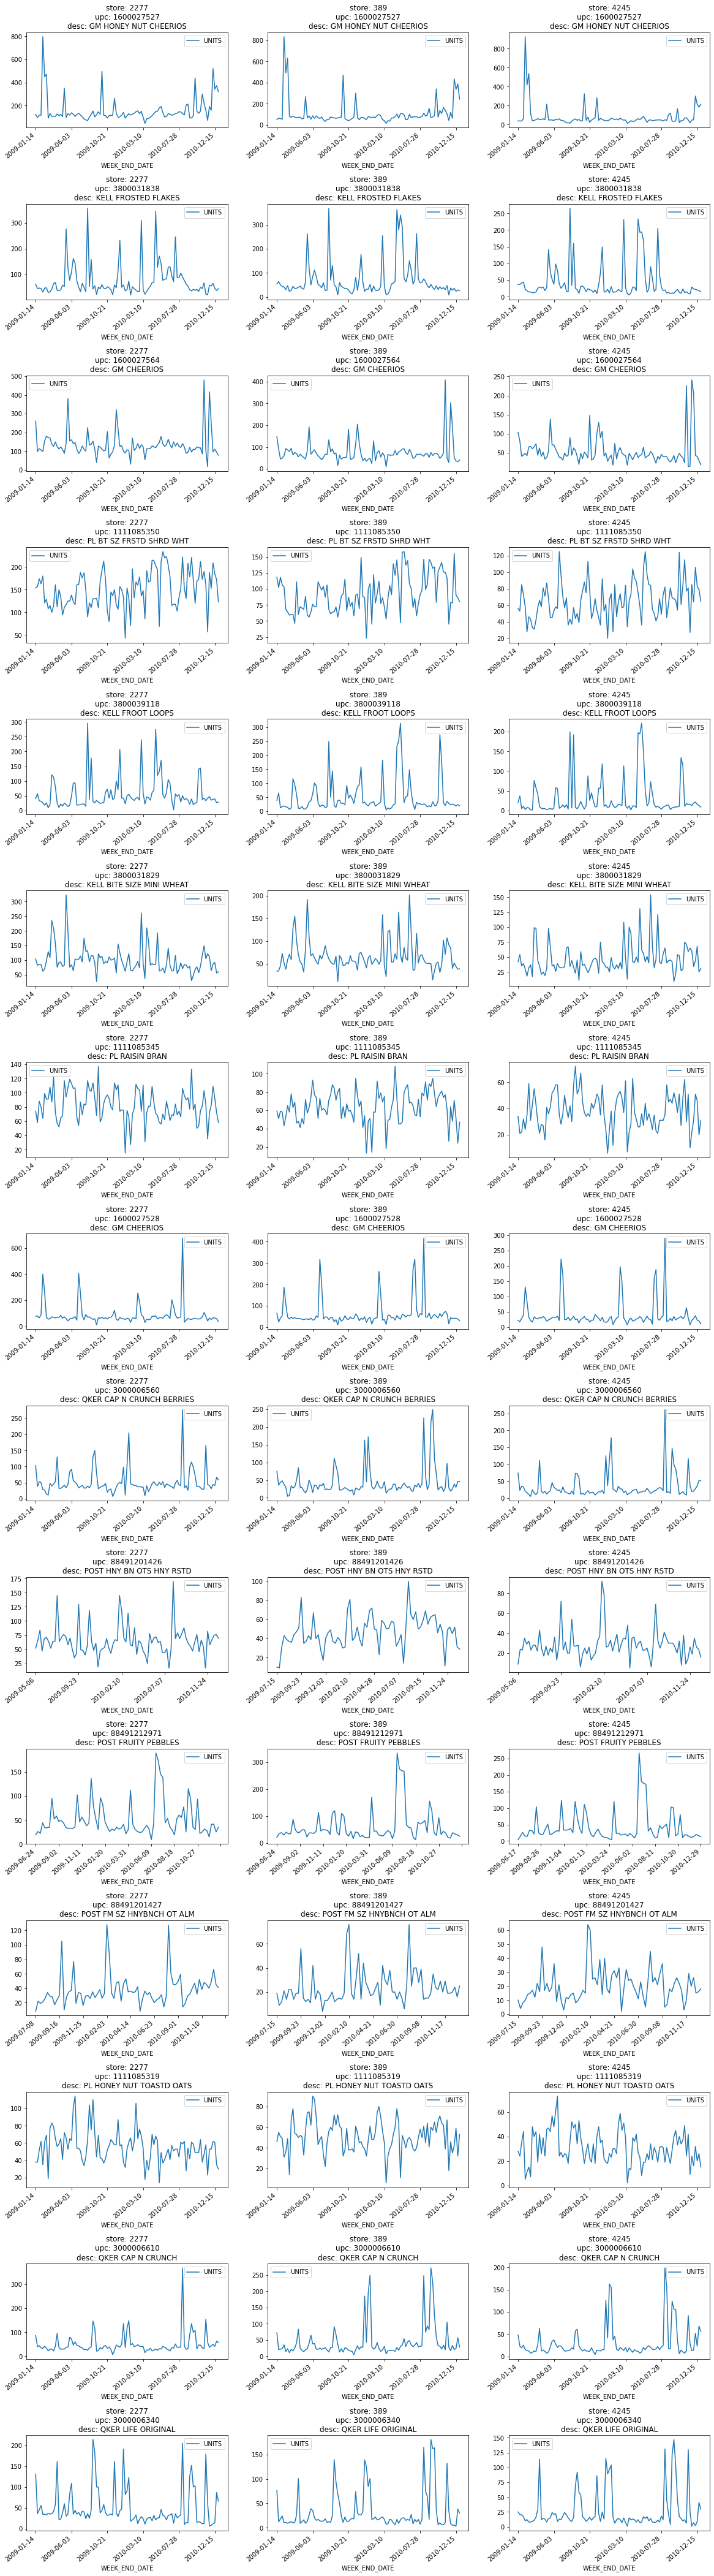

In [16]:
plot_category(categories[2], sorted_upc_cat, stores, merged_data, products_lookup)

Category: FROZEN PIZZA


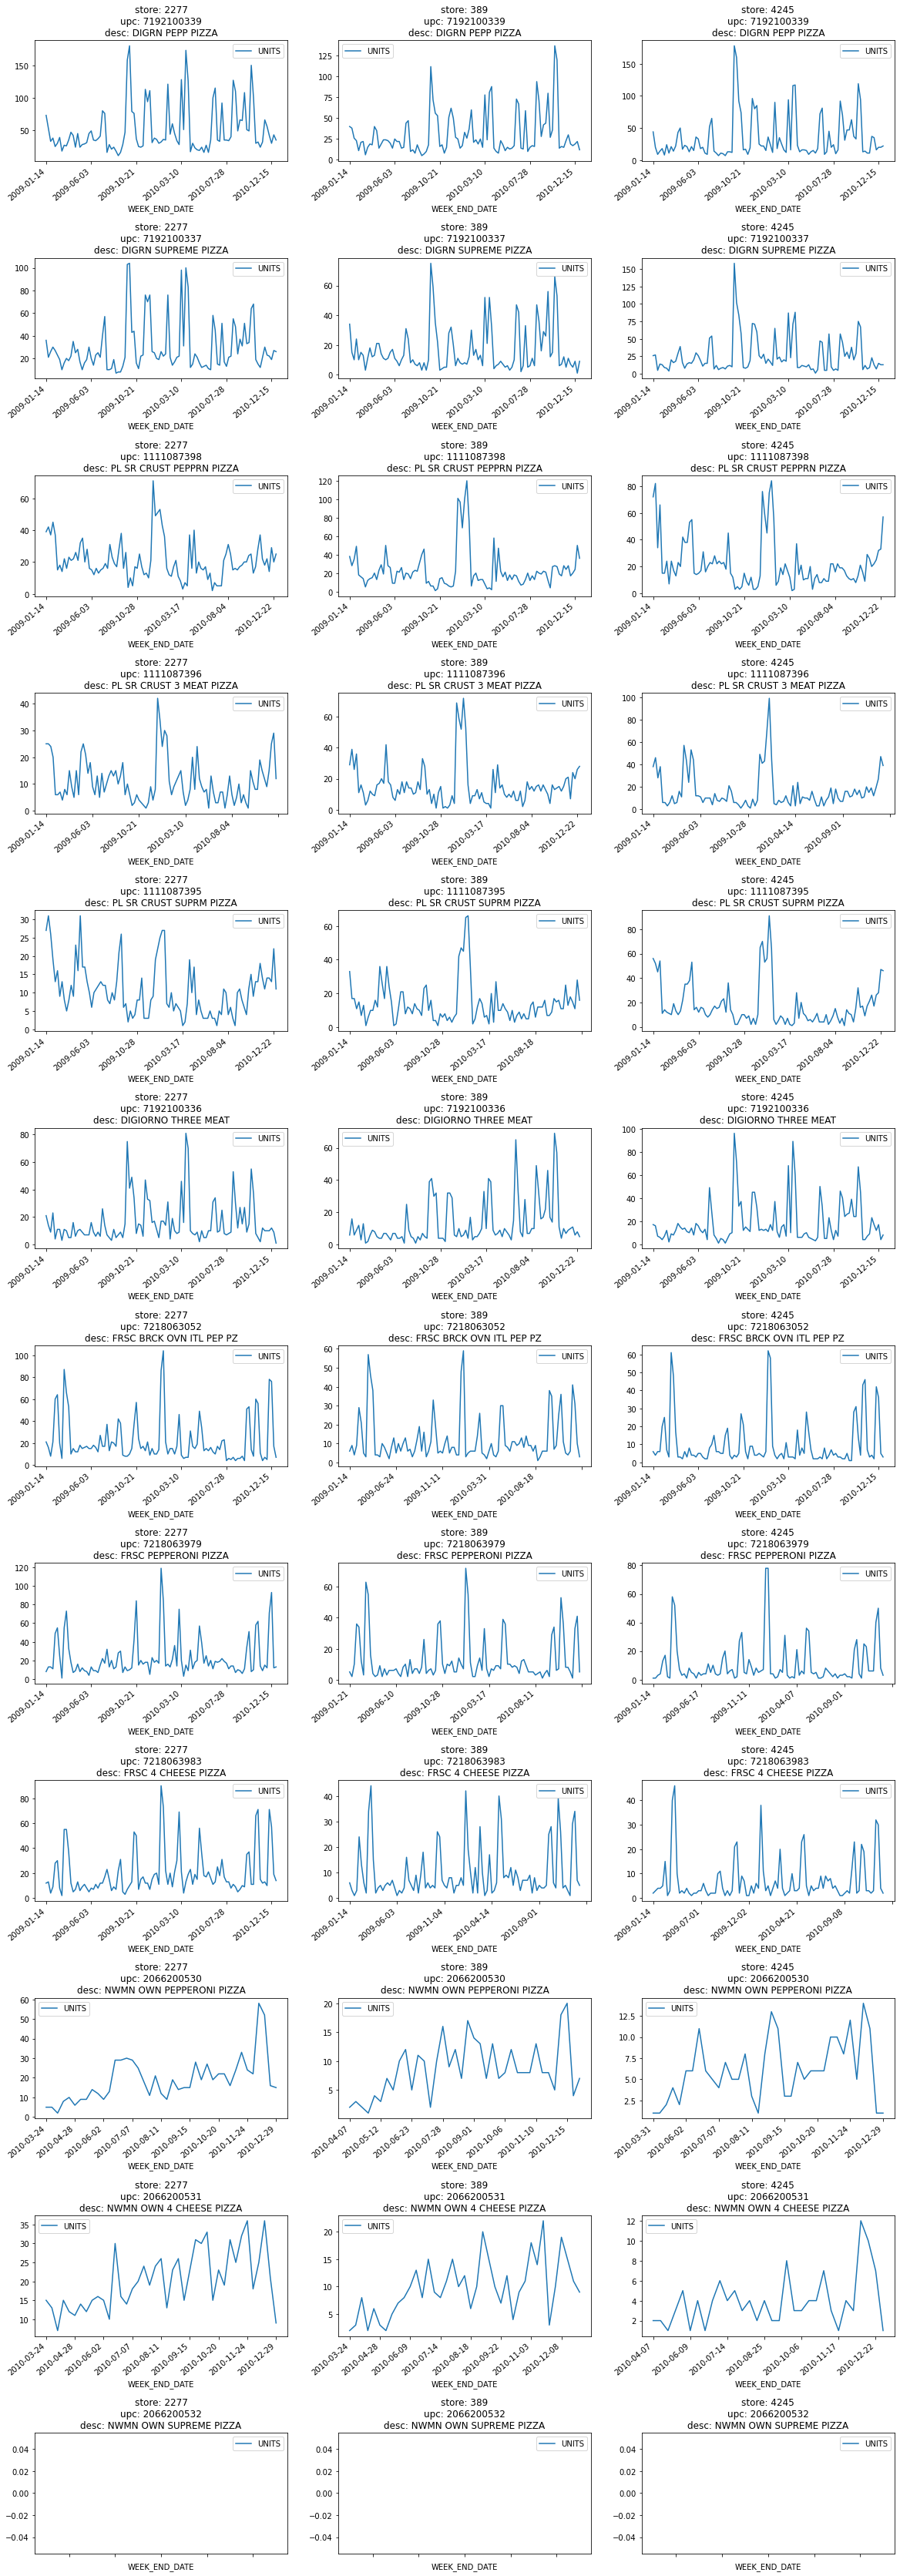

In [17]:
plot_category(categories[3], sorted_upc_cat, stores, merged_data, products_lookup)